In [61]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph.

import matplotlib.pyplot as plt

#import plotly.express as px
#import plotly.offline as py
#py.init_notebook_mode(connected=True)
#import plotly.graph_objs as go

import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
# figure size in inches

%matplotlib inline

#import numpy as np # linear algebra
#import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#import matplotlib.pyplot as plt # this is used for the plot the graph 
#import seaborn as sns # used for plot interactive graph.
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
#%matplotlib inline

In [95]:
df = pd.read_excel('google2.xlsx')
df.head(15)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Caera & Grid & ScrapBoo,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3
1,Coloring boo oana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend PlMay,"January 15, 2018",2.0.0,4.0.3
2,"U Launcher Lite â€“ FREE Live Cool Thees, Hide...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3
3,Setch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",0,4.2
4,Pixel Draw - Nuber Art Coloring Boo,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,50000,Free,0,Everyone,Art & Design,"march 26, 2017",1,2.3
6,Soe Effect Photo aer - Soe Editor,ART_AND_DESIGN,3.8,178,19.0,50000,Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29.0,1000000,Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2
8,Garden Coloring Boo,ART_AND_DESIGN,4.4,13791,33.0,1000000,Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3
9,ids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1,10000,Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3


In [96]:
df[df['Rating'] == 19]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life ade WI-Fi Touchscreen Photo Frae,1.9,19.0,3,1000.0,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4,NaN


In [97]:
df.iloc[10472,1:] = df.iloc[10472,1:].shift(1)
df[10471:10476]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042.0,404.0,100000,Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3
10472,Life ade WI-Fi Touchscreen Photo Frae,NaN,1.9,19.0,3.0,1000,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4
10473,osino Wi-Fi: free WiFi,TOOLS,4.2,134203.0,4.1,10000000,Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4
10474,Sat-Fi Voice,COUNICATION,3.4,37.0,14.0,1000,Free,0,Everyone,Counication,"November 21, 2014",2.2.1.5,2.2
10475,Wi-Fi Visualizer,TOOLS,3.9,132.0,2.6,50000,Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3


In [98]:
df["Last Updated"] = pd.to_datetime(df['Last Updated'])
df['year_added']=df['Last Updated'].dt.year
df['month_added']=df['Last Updated'].dt.month

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 15 columns):
App               10840 non-null object
Category          10840 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null float64
Size              10841 non-null float64
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10841 non-null object
Genres            10840 non-null object
Last Updated      10841 non-null datetime64[ns]
Current Ver       10832 non-null object
Android Ver       10839 non-null object
year_added        10841 non-null int64
month_added       10841 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(2), object(9)
memory usage: 1.2+ MB


In [100]:
df = df.fillna(0)
df.head(50)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year_added,month_added
0,Photo Editor & Candy Caera & Grid & ScrapBoo,ART_AND_DESIGN,4.1,159.0,19.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3,2018,1
1,Coloring boo oana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend PlMay,2018-01-15,2.0.0,4.0.3,2018,1
2,"U Launcher Lite â€“ FREE Live Cool Thees, Hide...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3,2018,8
3,Setch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,0,4.2,2018,6
4,Pixel Draw - Nuber Art Coloring Boo,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4,2018,6
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167.0,5.6,50000.0,Free,0.0,Everyone,Art & Design,2017-03-26,1,2.3,2017,3
6,Soe Effect Photo aer - Soe Editor,ART_AND_DESIGN,3.8,178.0,19.0,50000.0,Free,0.0,Everyone,Art & Design,2018-04-26,1.1,4.0.3,2018,4
7,Infinite Painter,ART_AND_DESIGN,4.1,36815.0,29.0,1000000.0,Free,0.0,Everyone,Art & Design,2018-06-14,6.1.61.1,4.2,2018,6
8,Garden Coloring Boo,ART_AND_DESIGN,4.4,13791.0,33.0,1000000.0,Free,0.0,Everyone,Art & Design,2017-09-20,2.9.2,3,2017,9
9,ids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121.0,3.1,10000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-07-03,2.8,4.0.3,2018,7


In [101]:
df['Installs'] = df['Installs'].apply(lambda x: float(x))

In [104]:
df['Price'] = df['Price'].apply(lambda x: float(x))

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 15 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            10841 non-null float64
Reviews           10841 non-null float64
Size              10841 non-null float64
Installs          10841 non-null float64
Type              10841 non-null object
Price             10841 non-null float64
Content Rating    10841 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null datetime64[ns]
Current Ver       10841 non-null object
Android Ver       10841 non-null object
year_added        10841 non-null int64
month_added       10841 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(2), object(7)
memory usage: 1.2+ MB


In [43]:
#Se hace un conteo de los juegos gratis vs de paga
pd.value_counts(df['Type'])

Free    8714
Paid     644
Name: Type, dtype: int64

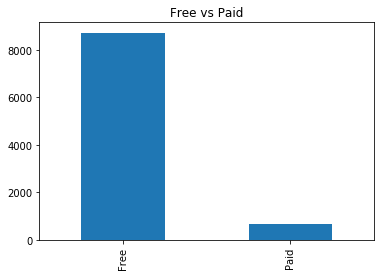

In [12]:
#Se hace un grafico de barras para mostrar los juegos Free vs Paid
plot = df['Type'].value_counts().plot(kind='bar',
                                            title='Free vs Paid')

Text(0.5, 1.0, 'Count of app in each category')

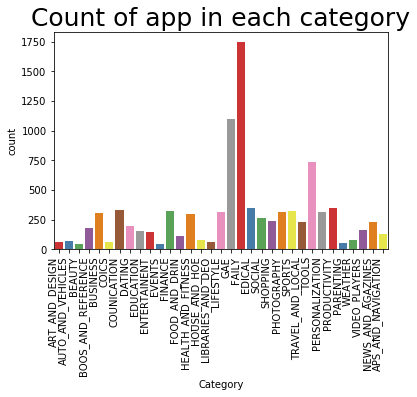

In [13]:
g = sns.countplot(x="Category",data=df, palette = "Set1")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g 
plt.title('Count of app in each category',size = 25)

Text(0.5, 1, 'Boxplot de Rating VS Categoria')

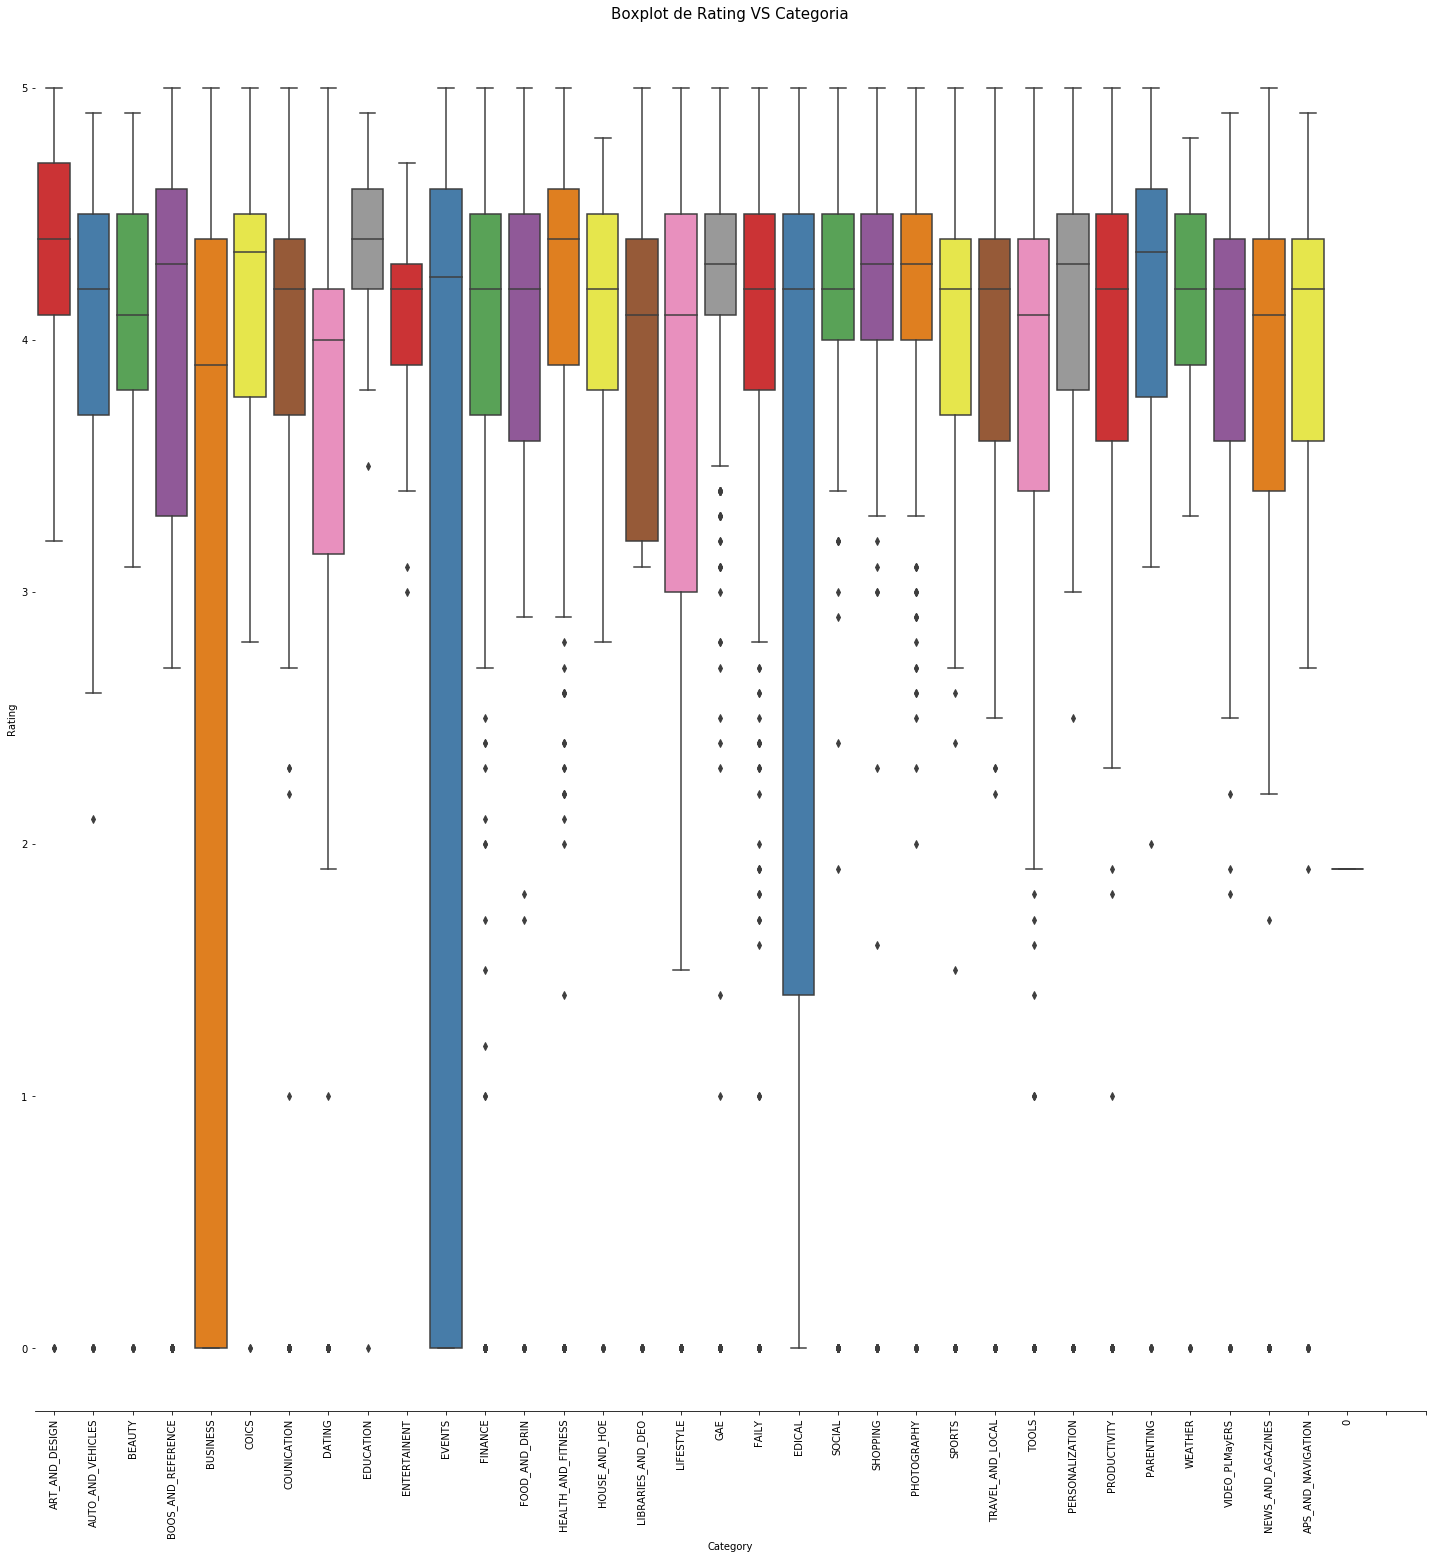

In [125]:
g = sns.catplot(x="Category",y="Rating",data=df, kind="box", height =  ,
palette = "Set1")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g.set( xticks=range(0,36))
g = g.set_ylabels("Rating")
plt.title('Boxplot de Rating VS Categoria',size = 15)

In [15]:
df_rating_not_0 = df.loc[(df['Rating'] != 0)]

In [16]:
###Utilizamos las siguiente funcion para obtener la probabilidad de obtener buena puntuacion.
genres = df.Genres.unique()
probability_genres = []
for names in genres:
    df_selected = df_rating_not_0.loc[(df_rating_not_0['Genres'] == names)]['Rating']
    probability_genres += [round((sum(df_selected[df_selected>=4].value_counts())/len(df_selected))*100,1)]
frame = {'Genre': genres,'Probability %': probability_genres}
df_probability = pd.DataFrame(frame)
df_probability = df_probability.sort_values(['Probability %'],ascending=[True])
df_probability

,Genre,Probability %
1,Art & Design;Pretend Play,0.0
96,Parenting;Brain Gaes,0.0
103,Health & Fitness;Action & Adventure,0.0
97,Parenting;Education,33.3
108,Boos & Reference;Education,50.0
104,Educational,50.0
81,Entertainent;Pretend Play,50.0
80,Role Playing;Pretend Play,60.0
53,Educational;Creativity,60.0
10,Dating,64.6


Text(0.5, 1.0, 'Distribution of Rating')

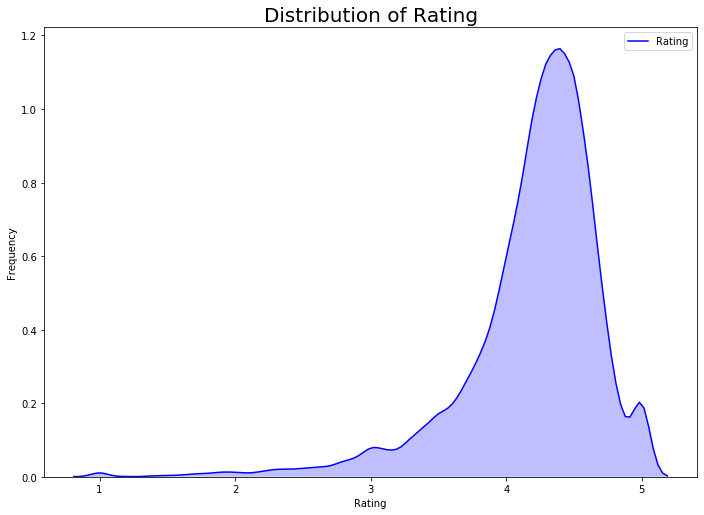

In [17]:
# rating distibution 
rcParams['figure.figsize'] = 11.7,8.27
g = sns.kdeplot(df.Rating, color="Blue", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating',size = 20)

In [18]:
df['isNotFree'] = df['Price'].apply(lambda x: 1 if x > 0 else 0)

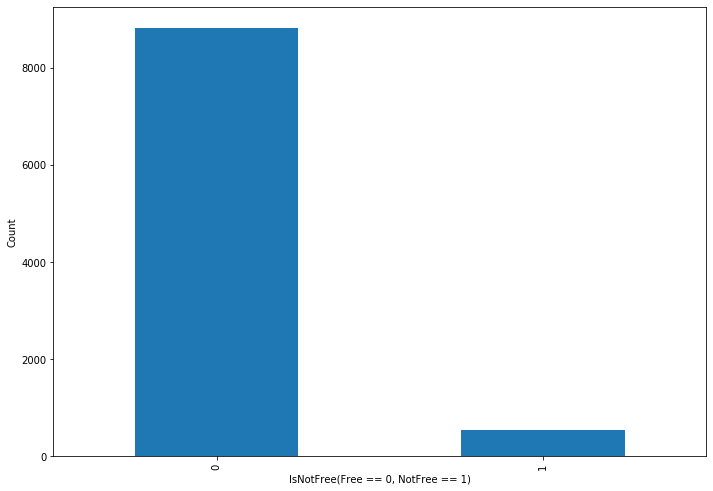

In [19]:
df['isNotFree'].value_counts().plot.bar()
plt.xlabel('IsNotFree(Free == 0, NotFree == 1)')
plt.ylabel('Count')
plt.show()

In [58]:
x=df

In [59]:
d1=x[x['Type']=='Free']
d2=x[x['Type']=='Paid']

In [126]:
#Rating
#Se observa un comportamiento tanto para las apps gratis como las de paga, 
#la mayoria se concentra con una calificacion arriba de 4

import plotly
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot


col='Rating'
v1=d1[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.astype(str).sort_values(col)
v2=d2[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1 = go.Scatter(x=v1[col], y=v1["count"], name="Free", marker=dict(color="#a678de"))
trace2 = go.Scatter(x=v2[col], y=v2["count"], name="Paid", marker=dict(color="#6ad49b"))
y = [trace1, trace2]
layout={'title':"Ratings of the free vs paid app",'xaxis':{'title':"Ratings"}}
fig = go.Figure(data=y, layout=layout)
iplot(fig)

In [65]:
#Grafico que muestra como se organizan las apps tanto free como paid
col='Category'
v1=d1[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.sort_values(col)
v2=d2[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1 = go.Scatter(x=v1[col], y=v1["count"], name="Free", marker=dict(color="#a678de"))
trace2 = go.Scatter(x=v2[col], y=v2["count"], name="Paid", marker=dict(color="#6ad49b"))
y = [trace1, trace2]
layout={'title':"App Category"}
fig = go.Figure(data=y, layout=layout)
iplot(fig)

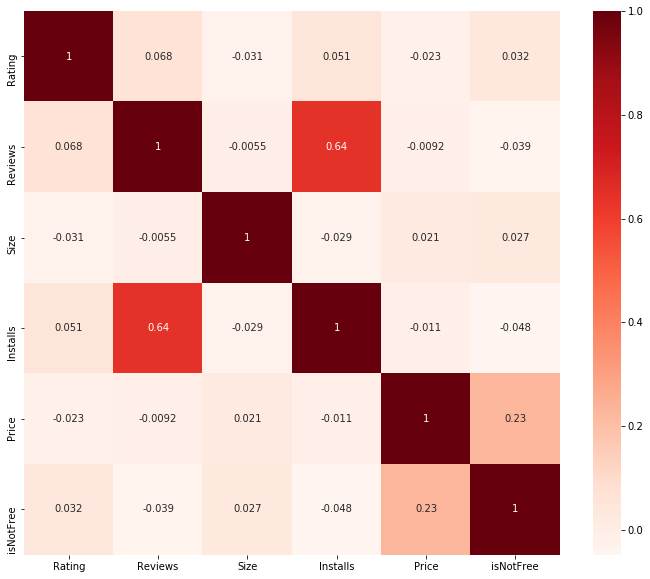

In [20]:
#con este metodo podemos encontrar las caracteristicas del data frame
#que se relacionan. Con El diagrama de correlacion de Pearson
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [46]:
#Empezamos con MAchine Learning

In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
#import xgboost as xgb

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9358 entries, 0 to 10840
Data columns (total 14 columns):
App               9358 non-null object
Category          9358 non-null object
Rating            9358 non-null float64
Reviews           9358 non-null int64
Size              9358 non-null float64
Installs          9358 non-null float64
Type              9358 non-null object
Price             9358 non-null int64
Content Rating    9358 non-null object
Genres            9358 non-null object
Last Updated      9358 non-null object
Current Ver       9358 non-null object
Android Ver       9358 non-null object
isNotFree         9358 non-null int64
dtypes: float64(3), int64(3), object(8)
memory usage: 1.4+ MB


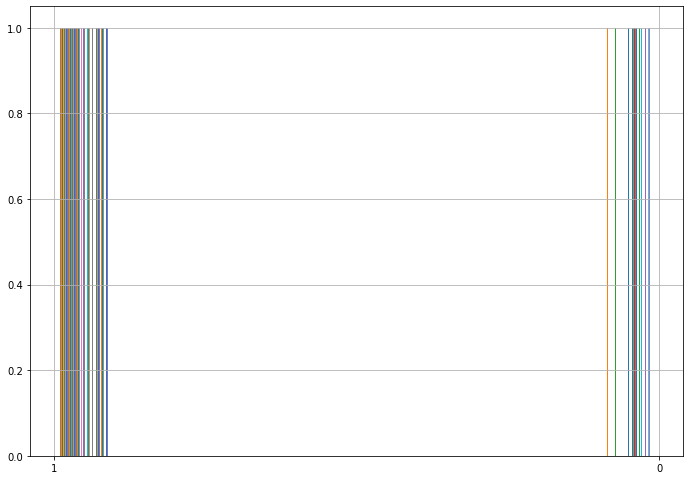

In [57]:
df_train = df[['Reviews', 'Size', 'Price','Installs' ]]
target = df['Rating']

df_train = pd.get_dummies(df_train)

def categorize_rating(x):
    if x > 4:
        return 1
    else:
        return 0

target = target.apply(categorize_rating)

target.astype(str).hist()



In [25]:
#categorize_rating

<function __main__.categorize_rating(x)>

In [26]:
X_train, X_test, y_train, y_test = train_test_split(df_train.values, target, test_size=0.2, random_state=1989, stratify=target)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (7486, 4)
X_test shape: (1872, 4)


In [27]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate



In [28]:
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [29]:
models = [RandomForestClassifier(), LGBMClassifier(), XGBClassifier()]

kfold = KFold(n_splits=5, random_state=1989)

clf_comparison = pd.DataFrame(columns=['Classfier_name','train_score', 'test_score'])

for i, model in enumerate(models):
    clf = model
    cv_result = cross_validate(model, X_train, y_train, cv=kfold, scoring='accuracy')
    clf_comparison.loc[i, 'Classfier_name'] = model.__class__.__name__
    clf_comparison.loc[i, 'train_score'] = cv_result['train_score'].mean()
    clf_comparison.loc[i, 'test_score'] = cv_result['test_score'].mean()

clf_comparison


KeyError: 'train_score'

In [68]:
d3=x[x['Rating']>4]
d4=x[x['Rating']<=4]

In [70]:
col='Content Rating'
v1=d3[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.sort_values(col)
v2=d4[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1 = go.Bar(x=v1[col], y=v1["count"], name="rating > 4", marker=dict(color="#6ad49b"))
trace2 = go.Bar(x=v2[col], y=v2["count"], name="rating <= 4", marker=dict())
y = [trace1, trace2]
layout={'title':"Rating over the contents",'xaxis':{'title':"Content Rating"}}
fig = go.Figure(data=y, layout=layout)
iplot(fig)

In [71]:
col='Category'
v1=d3[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.sort_values(col)
v2=d4[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1 = go.Bar(x=v1[col], y=v1["count"], name="rating >4", marker=dict(color="#a678de"))
trace2 = go.Bar(x=v2[col], y=v2["count"], name="rating <=4", marker=dict())
y = [trace1, trace2]
layout={'title':"Category wise Rating"}
fig = go.Figure(data=y, layout=layout)
iplot(fig)

In [106]:
#Limpiando los datos.
#checando valores nullos
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
year_added        0
month_added       0
dtype: int64

In [107]:
df.dropna(how ='any', inplace = True)
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
year_added        0
month_added       0
dtype: int64

In [108]:
df.head(3)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year_added,month_added
0,Photo Editor & Candy Caera & Grid & ScrapBoo,ART_AND_DESIGN,4.1,159.0,19.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3,2018,1
1,Coloring boo oana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend PlMay,2018-01-15,2.0.0,4.0.3,2018,1
2,"U Launcher Lite â€“ FREE Live Cool Thees, Hide...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3,2018,8


In [109]:
df2=df


In [110]:
catgry=pd.get_dummies(df2['Category'],prefix='catg',drop_first=True)
typ=pd.get_dummies(df2['Type'],prefix='typ',drop_first=True)
cr=pd.get_dummies(df2['Content Rating'],prefix='cr',drop_first=True)
frames=[df2,catgry,typ,cr]
df2=pd.concat(frames,axis=1)
df2.drop(['Category','Installs','Type','Content Rating'],axis=1,inplace=True)
df2.drop(['App','Size','Price','Genres','Last Updated','Current Ver','Android Ver'],axis=1,inplace=True)


In [111]:
df2.head()

,Rating,Reviews,year_added,month_added,catg_APS_AND_NAVIGATION,catg_ART_AND_DESIGN,catg_AUTO_AND_VEHICLES,catg_BEAUTY,catg_BOOS_AND_REFERENCE,catg_BUSINESS,...,catg_TRAVEL_AND_LOCAL,catg_VIDEO_PLMayERS,catg_WEATHER,typ_Free,typ_Paid,cr_Everyone,cr_Everyone 10,cr_Teen,cr_Unrated,cr_ature 17
0,4.1,159.0,2018,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1,3.9,967.0,2018,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2,4.7,87510.0,2018,8,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,4.5,215644.0,2018,6,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,4.3,967.0,2018,6,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [112]:
#Entreando el modelo.
#El 80% de los datos son para train_test y el 20% para test_data

X=df2.drop('Rating',axis=1)
y=df2['Rating'].values
y=y.astype('int')

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [114]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

LogisticRegression_accuracy: 0.6463808206546796


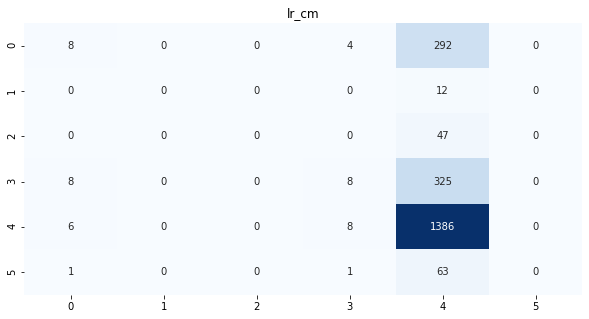

In [127]:
#Modelo de Regresion Logistica
lr_c=LogisticRegression(random_state=0)
lr_c.fit(X_train,y_train)
lr_pred=lr_c.predict(X_test)
lr_cm=confusion_matrix(y_test,lr_pred)
lr_ac=accuracy_score(y_test, lr_pred)
print('LogisticRegression_accuracy:',lr_ac)
plt.figure(figsize=(10,5))
plt.title("lr_cm")
sns.heatmap(lr_cm,annot=True,cmap="Blues",fmt="d",cbar=False)
plt.show()

DecisionTree_Classifier_accuracy: 0.673582295988935


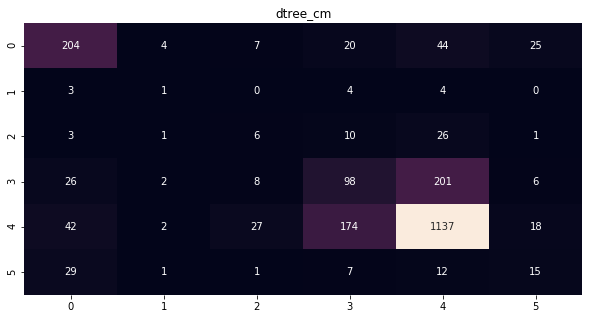

In [118]:
# DecisionTree Classifier
dtree_c=DecisionTreeClassifier(criterion='entropy',random_state=0)
dtree_c.fit(X_train,y_train)
dtree_pred=dtree_c.predict(X_test)
dtree_cm=confusion_matrix(y_test,dtree_pred)
dtree_ac=accuracy_score(dtree_pred,y_test)
plt.figure(figsize=(10,5))
plt.title("dtree_cm")
sns.heatmap(dtree_cm,annot=True,fmt="d",cbar=False)
print('DecisionTree_Classifier_accuracy:',dtree_ac)

RandomForest_accuracy: 0.7063162747810051


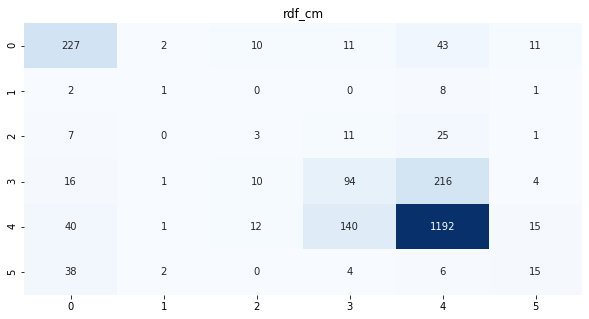

In [120]:
#RandomForest
rdf_c=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rdf_c.fit(X_train,y_train)
rdf_pred=rdf_c.predict(X_test)
rdf_cm=confusion_matrix(y_test,rdf_pred)
rdf_ac=accuracy_score(rdf_pred,y_test)
plt.figure(figsize=(10,5))
plt.title("rdf_cm")
sns.heatmap(rdf_cm,annot=True,cmap="Blues",fmt="d",cbar=False)
print('RandomForest_accuracy:',rdf_ac)

Text(0.5, 1.0, 'Models')

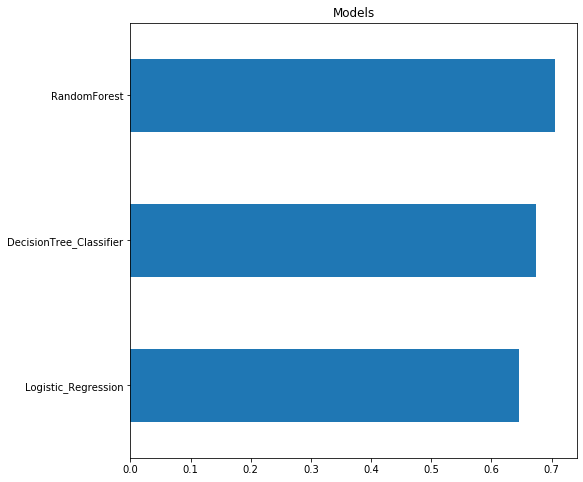

In [128]:
%matplotlib inline
model_accuracy = pd.Series(data=[lr_ac,dtree_ac,rdf_ac], 
        index=['Logistic_Regression','DecisionTree_Classifier','RandomForest'])
fig= plt.figure(figsize=(8,8))
model_accuracy.sort_values().plot.barh()
plt.title('Models')